### **Installing dependencies**

In [ ]:
!pip install sentence-transformers
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.8 MB/s 
     |████████████████████████████████| 5.5 MB 70.1 MB/s 
     |████████████████████████████████| 1.3 MB 64.3 MB/s 
     |████████████████████████████████| 182 kB 75.8 MB/s 
     |████████████████████████████████| 7.6 MB 62.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3bb134eb298d24eab596e1509f78013ab9d702fafbe194606666cab728c37690
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Importing section_dict from drive**

In [ ]:
from google.colab import drive
import json

drive.mount('/content/drive',force_remount=True)
section_dict = dict()

with open('/content/drive/MyDrive/section_dict.json', 'r', encoding = 'utf-8') as file:
  section_dict = json.load(file)

Mounted at /content/drive


### **Creating model and performing semantic search**

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

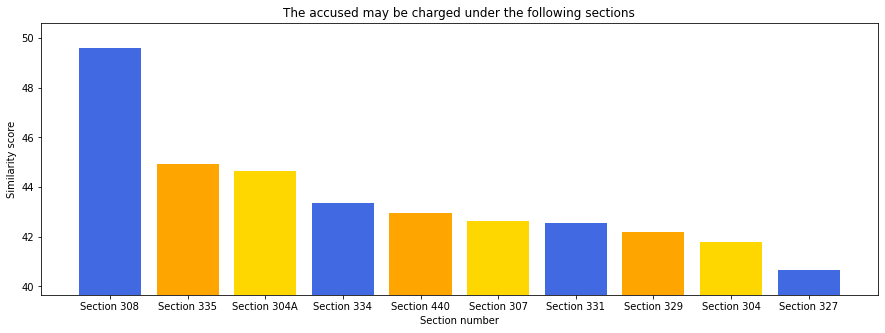



Section 308 : 

Whoever does any act with such intention or knowledge and under such circumstances that, if he by that act caused death, he would be guilty of culpable homicide not amounting to murder, shall be punished with imprisonment of either description for a term which may extend to three years, or with fine, or with both; and, if hurt is caused to any person by such act, shall be punished with imprisonment of either description for a term which may extend to seven years, or with fine, or with both.


Section 335 : 

Whoever voluntarily causes grievous hurt on grave and sudden provocation, if he neither intends nor knows himself to be likely to cause grievous hurt to any person other than the person who gave the provocation shall be punished with imprisonment of either description for a term which may extend to four years, or with fine which may extend to two thousand rupees, or with both.


Section 304A : 

Whoever causes the death of any person by doing any rash or negligent

In [ ]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')#msmarco-distilbert-base-v4')
corpus = []

for v in section_dict.values():
  corpus.append(v)

corpus_embedding = model.encode(corpus, convert_to_tensor=True, show_progress_bar=True, batch_size=32)
#'X has been accused of producing fake currency.','X tried to stab Y to death.','X stole my bike.'
query = ['X tried to stab Y to death.']

query_embedding = model.encode(query, convert_to_tensor=True)

hits = util.semantic_search(query_embedding, corpus_embedding, top_k = 10)

sections_hit = dict()

for hit in hits[0]:
    
    desc = corpus[hit['corpus_id']]
    for k,v in section_dict.items():
      if v==desc:
        sections_hit[k] = hit['score']

xval = list(sections_hit.keys())
yval = list(sections_hit.values())
f = lambda x:round(x*100,2)
yval = list(map(f,yval))

plt.figure(figsize = (15,5))
plt.bar(xval,yval,color = ['royalblue','orange','gold'])
plt.xlabel("Section number")
plt.ylabel("Similarity score")
plt.title("The accused may be charged under the following sections")
plt.ylim(min(yval)-1,max(yval)+1)
plt.show()

print("\n")
for k in sections_hit.keys():
  print(k + ' : \n\n' + section_dict[k] + '\n\n')
